In [1]:
!pip install matplotlib deap

                                              0.0/8.0 MB ? eta -:--:--
                                              0.1/8.0 MB 2.6 MB/s eta 0:00:03
                                              0.1/8.0 MB 2.1 MB/s eta 0:00:04
     -                                        0.2/8.0 MB 2.5 MB/s eta 0:00:04
     -                                        0.4/8.0 MB 2.5 MB/s eta 0:00:04
     --                                       0.5/8.0 MB 2.3 MB/s eta 0:00:04
     ---                                      0.6/8.0 MB 2.4 MB/s eta 0:00:04
     ---                                      0.7/8.0 MB 2.4 MB/s eta 0:00:04
     ----                                     0.9/8.0 MB 2.4 MB/s eta 0:00:03
     ----                                     1.0/8.0 MB 2.4 MB/s eta 0:00:03
     ------                                   1.2/8.0 MB 2.7 MB/s eta 0:00:03
     ------                                   1.3/8.0 MB 2.5 MB/s eta 0:00:03
     -------                                  1.6/8.0 MB 2.8 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


gen	nevals	avg    	min    
0  	300   	174.952	50.7179
1  	235   	174.952	50.7179
2  	222   	174.952	50.7179
3  	233   	174.952	50.7179
4  	245   	174.952	50.7179
5  	224   	174.952	50.7179
6  	235   	174.952	50.7179
7  	222   	174.952	50.7179
8  	236   	174.952	50.7179
9  	229   	174.952	50.7179
10 	233   	174.952	50.7179
11 	220   	174.952	50.7179
12 	223   	174.952	50.7179
13 	242   	174.952	50.7179
14 	233   	174.952	50.7179
15 	216   	174.952	50.7179
16 	217   	174.952	50.7179
17 	239   	174.952	50.7179
18 	231   	174.952	50.7179
19 	217   	174.952	50.7179
20 	221   	174.952	50.7179
21 	233   	174.952	50.7179
22 	225   	174.952	50.7179
23 	230   	174.952	50.7179
24 	201   	174.952	50.7179
25 	229   	174.952	50.7179
26 	234   	174.952	50.7179
27 	223   	174.952	50.7179
28 	218   	174.952	50.7179
29 	222   	174.952	50.7179
30 	229   	174.952	50.7179
31 	241   	174.952	50.7179
32 	230   	174.952	50.7179
33 	231   	174.952	50.7179
34 	237   	174.952	50.7179
35 	227   	174.952	50.7179
3

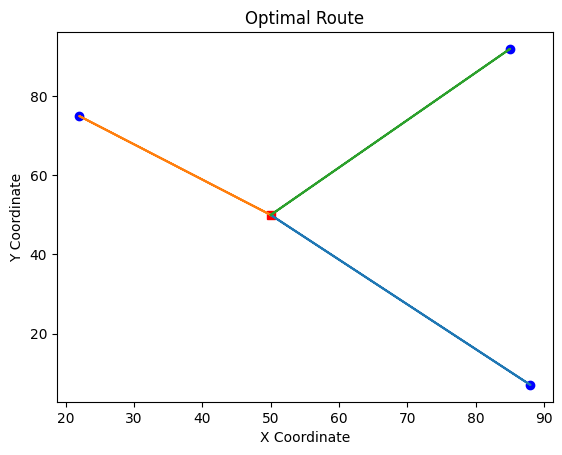

In [2]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Define the number of locations and vehicles
num_locations = 3  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 5  # Define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

# Setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
